In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 

In [4]:
dataset=pd.read_csv('tech_layoffs.csv')
print(dataset.shape)
dataset.head()

(489, 9)


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f..."


In [24]:
dataset.value_counts('company')

len(dataset['company'].unique())
unique_layoff_values=dataset['total_layoffs'].unique()
print(unique_layoff_values)
unclear_layoff_values=dataset[dataset['total_layoffs']=="Unclear"]
print(unclear_layoff_values.shape)
unclear_layoff_values.head(182)
#top_10_company=dataset[dataset['total_layoffs']>].sort_values(ascending=False)

['20' 'Unclear' '13' '24' '25' '26' '50' '11' '110' '12' '15' '150' '220'
 '63' '750' '100' '237' '58' '130' '35' '60' '68' '84' '90' '120' '30'
 '32' '56' '59' '85' '169' '70' '78' '140' '142' '21' '65' '80' '200'
 '123' '136' '156' '40' '94' '10' '124' '55' '7' '125' '16' '250' '45'
 '47' '5' '54' '450' '170' '27' '104' '43' '254' '260' '57' '640' '67'
 '76' '23' '37' '72' '74' '950' '378' '1100' '162' '173' '33' '44' '158'
 '262' '64' '5000' '111' '88' '1000' '101' '400' '14' '1050' '109' '1095'
 '113' '149' '163' '167' '175' '180' '19' '224' '226' '2300' '310' '370'
 '73' '75' '82' '97' '38' '700' '270' '18000' '300' '350' '4100' '95'
 '588' '1250' '840' '155' '509' '99' '800' '11000' '225' '500' '760' '550'
 '1332' '1280' '138' '83' '46' '1013' '647' '115' '467' '2110' '3740'
 '4000' '10000' '12000' '153' '240' '4084' '451' '480' '558' '69' '825'
 '870' '9090']
(182, 9)


,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes
1,VideoAmp,Unclear,2,9/19/2022,Advertising platforms,Los Angeles,Company memo,Private,NaN
5,NextRoll,Unclear,3,7/8/2022,Marketing Tech,San Francisco,Business Insider,Private,NaN
18,Outreach,Unclear,5,8/2/2022,Sales Tech,Seattle,LinkedIn,Private,NaN
19,Boosted Commerce,Unclear,5,7/25/2022,E-commerce,Los Angeles,Business Insider,Private,NaN
20,Forward,Unclear,5,7/11/2022,Health Care,San Francisco,Fierce Healthcare,Private,NaN
...,...,...,...,...,...,...,...,...,...
464,Starry,Unclear,74,1/18/2023,"WiFi, hardware",Boston,SEC filings,Public,NaN
485,Oracle,Unclear,Unclear,8/1/2022,"SaaS, enterprise software",Austin,The Information,Public,The Information reported thousands of people w...
486,LivePerson,Unclear,Unclear,9/15/2022,Customer service,New York,LinkedIn,Public,NaN
487,Skillz,Unclear,Unclear,8/29/2022,"Mobile Apps, Gaming",San Francisco,Seeking Alpha,Public,NaN


In [26]:
#add a new column where it shows each company gives a clear layoff number or not 

dataset['layoff_status']=np.where(dataset['total_layoffs']=="Unclear","Unclear","Clear")

               company
layoff_status         
Clear              307
Unclear            182


<Axes: title={'center': 'Companies with clear and unclear layoff numbers'}, ylabel='company'>

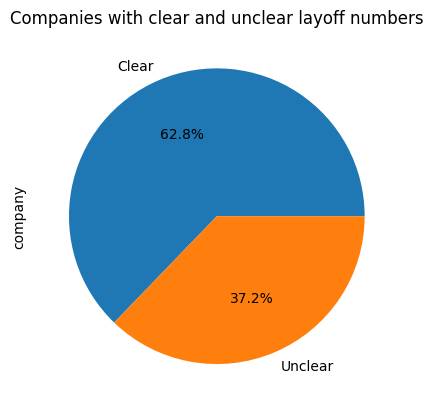

In [32]:
dataset.head(10)
company_and_layoff_status=dataset[['company','layoff_status']]
company_and_layoff_status.head(10)

grouped_by_layoff=company_and_layoff_status.groupby('layoff_status').count()
print(grouped_by_layoff)

grouped_by_layoff.plot(kind='pie',y='company',autopct='%1.1f%%',legend=False,title='Companies with clear and unclear layoff numbers')


<Axes: title={'center': 'percentage of companies by sector(public/private)'}, xlabel='sector', ylabel='number of companies'>

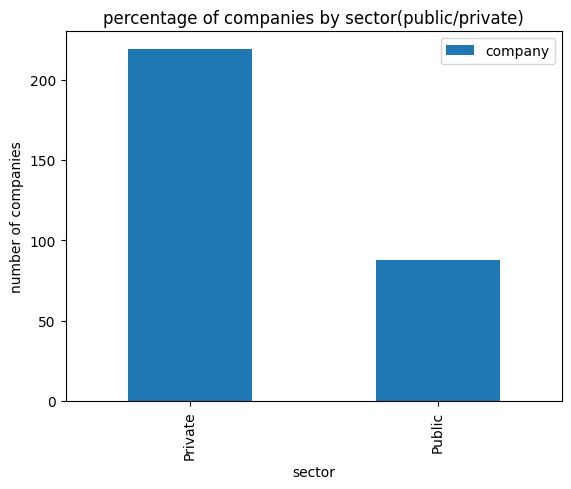

In [58]:
type_of_sector=dataset[["company",'status']]
type_of_sector=type_of_sector.groupby('status').count()
type_of_sector.head(10)
type_of_sector.plot(kind="bar",title="percentage of companies by sector(public/private)",legend="True",ylabel="number of companies",xlabel="sector" )

Percentage of companies with unclear layoff number are set aside and analysis is only dont with the clear layoff values

In [ ]:
#Using only the know dataaset with clear layoff numbers 
dataset=dataset[dataset['layoff_status']=="Clear"]

In [36]:
additional_context=dataset['additional_notes'].unique()
print(f"Total unique additional notes: {len(additional_context)}")
for note in additional_context:
     print("-"*10)
     print(note)
     print("-"*10)

Total unique additional notes: 16
----------
nan
----------
----------
Per Axios, 22 of the employees laid off were from Thirty Madison, and two were from new parent company Nurx. Layoffs affected around 3% of employees.
----------
----------
Layoffs affect employees in the U.S., Israel, and Japan. Layoffs affected around 13% of employees.
----------
----------
Company did not respond to a request to confirm details of layoffs. Layoffs affected around 13% of employees.
----------
----------
Nate reportedly had two layoffs. In June, the company laid of 30 people, or 20% of the company at the time.
----------
----------
Outschool laid off 31 people, or 18% of the company, back in July. In December it laid off another 43 people, which amounted to 25% of the staff at the time.
----------
----------
Rasa was founded in Berlin but moved its headquarters to San Francisco in 2019. Layoffs affected employees in the U.S., Germany, and U.K. Layoffs affected around 40% of employees.
----------
---

In [41]:
dataset.drop(['additional_notes',"impacted_workforce_percentage"],axis=1)

,company,total_layoffs,reported_date,industry,headquarter_location,sources,status,layoff_status
0,C2FO,20,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,Clear
2,Amperity,13,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,Clear
3,Addepar,20,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,Clear
4,Thirty Madison,24,5/13/2022,Health Care,New York,Axios,Private,Clear
6,Armis Security,25,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,Clear
...,...,...,...,...,...,...,...,...
480,HashiCorp,69,1/11/2023,"cybersecurity, cloud infrastructure",San Francisco,Crunchbase News Reporting,Public,Clear
481,Quanergy Systems,72,12/14/2022,Autonomous vehicles,"Sunnyvale, CA",Silicon Valley Business Journal,Public,Clear
482,Doma,825,12/6/2022,"Insurtech, machine learning",San Francsico,Doma,Public,Clear
483,Wayfair,870,8/19/2022,"E-commerce, retail",Boston,Boston Globe,Public,Clear


In [66]:
#change total layoff column to numerics 
dataset['total_layoffs']=pd.to_numeric(dataset['total_layoffs'])
dataset.info()

top_10_company_with_highest_layoffs=dataset.sort_values(by="total_layoffs",ascending=False).head(10)
print(top_10_company_with_highest_layoffs)

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 484
Data columns (total 10 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        307 non-null    object
 1   total_layoffs                  307 non-null    int64 
 2   impacted_workforce_percentage  307 non-null    object
 3   reported_date                  307 non-null    object
 4   industry                       307 non-null    object
 5   headquarter_location           307 non-null    object
 6   sources                        307 non-null    object
 7   status                         307 non-null    object
 8   additional_notes               15 non-null     object
 9   layoff_status                  307 non-null    object
dtypes: int64(1), object(9)
memory usage: 34.5+ KB
        company  total_layoffs impacted_workforce_percentage reported_date  \
378      Amazon          18000                             5   

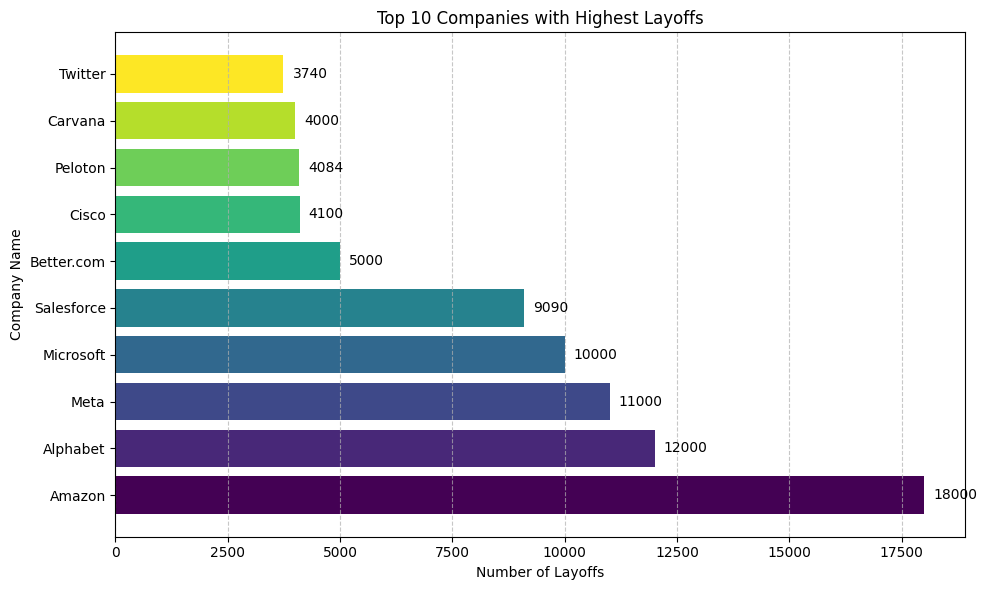

In [122]:
plt.figure(figsize=(10, 6))
bars = plt.barh(
     top_10_company_with_highest_layoffs['company'],
     top_10_company_with_highest_layoffs['total_layoffs'],
     color=plt.cm.viridis(np.linspace(0, 1, len(top_10_company_with_highest_layoffs)))
)
plt.xlabel("Number of Layoffs")
plt.ylabel("Company Name")
plt.title("Top 10 Companies with Highest Layoffs")
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Annotate values on bars
for bar in bars:
     plt.text(
          bar.get_width() + 200,  # Offset a bit from the bar
          bar.get_y() + bar.get_height() / 2,
          f"{int(bar.get_width())}",
          va='center'
     )

plt.tight_layout()
plt.show()

In [104]:
unique_industry=dataset['industry']
len(unique_industry)
unique_industry_as_list=[]
for i in unique_industry:
     i=i.split(",")
     list_k=[]
     for j in i:
          j=j.strip().lower()
          list_k.append(j)
     unique_industry_as_list.append(list_k)
print(unique_industry_as_list) 
print(type(unique_industry_as_list))  

dataset['sectors']=unique_industry_as_list
dataset.head(10)

[['fintech', 'payments'], ['saas', 'analytics'], ['fintech', 'data analytics'], ['health care'], ['cybersecurity'], ['food and beverage', 'e-commerce'], ['telehealth', 'wellness'], ['beauty tech'], ['productivity', 'enterprise software'], ['crypto'], ['health care'], ['transportation'], ['cybersecurity'], ['food delivery', 'ecommerce'], ['logistics'], ['food delivery', 'ecommerce'], ['blockchain', 'cryptocurrency'], ['media', 'e-commerce'], ['enterprise software', 'productivity'], ['transportation'], ['food delivery', 'ecommerce'], ['insurtech'], ['video games'], ['fintech'], ['crypto'], ['e-commerce', 'retail'], ['logistics'], ['cloud infrastructure', 'health care'], ['e-commerce'], ['fintech'], ['fintech', 'analytics'], ['robotics'], ['fintech', 'personal finance'], ['cannabis'], ['logistics'], ['video games', 'ar'], ['media/entertainment'], ['hr tech'], ['digital media', 'journalism'], ['marketing', 'media'], ['cybersecurity'], ['health care', 'predictive analytics'], ['saas', 'ente

,company,total_layoffs,impacted_workforce_percentage,reported_date,industry,headquarter_location,sources,status,additional_notes,layoff_status,sectors
0,C2FO,20,2,12/9/2022,"Fintech, payments","Leawood, KS",Kansas City Business Journal,Private,NaN,Clear,"[fintech, payments]"
2,Amperity,13,3,8/20/2022,"Saas, analytics",Seattle,Geekwire,Private,NaN,Clear,"[saas, analytics]"
3,Addepar,20,3,1/18/2023,"fintech, data analytics","Mountain View, CA",Fortune,Private,NaN,Clear,"[fintech, data analytics]"
4,Thirty Madison,24,3,5/13/2022,Health Care,New York,Axios,Private,"Per Axios, 22 of the employees laid off were f...",Clear,[health care]
6,Armis Security,25,4,12/8/2022,Cybersecurity,San Francisco,Calcalistech,Private,NaN,Clear,[cybersecurity]
7,Foxtrot,26,4,9/23/2022,"food and beverage, e-commerce",Chicago,Chicago Business,Private,NaN,Clear,"[food and beverage, e-commerce]"
8,Headspace Health,50,4,12/14/2022,"telehealth, wellness",Los Angeles,Bloomberg,Private,NaN,Clear,"[telehealth, wellness]"
9,RealSelf,11,5,7/21/2022,Beauty tech,Seattle,GeekWire,Private,NaN,Clear,[beauty tech]
10,New Relic,110,5,8/18/2022,"productivity, enterprise software","Bay Area, CA",MarketWatch,Private,NaN,Clear,"[productivity, enterprise software]"
11,Abra,12,5,6/30/2022,Crypto,Mountain View,The Block,Private,NaN,Clear,[crypto]


In [105]:
dataset.head(10)
dataset.info()
type(dataset['sectors'][0])

<class 'pandas.core.frame.DataFrame'>
Index: 307 entries, 0 to 484
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   company                        307 non-null    object
 1   total_layoffs                  307 non-null    int64 
 2   impacted_workforce_percentage  307 non-null    object
 3   reported_date                  307 non-null    object
 4   industry                       307 non-null    object
 5   headquarter_location           307 non-null    object
 6   sources                        307 non-null    object
 7   status                         307 non-null    object
 8   additional_notes               15 non-null     object
 9   layoff_status                  307 non-null    object
 10  sectors                        307 non-null    object
dtypes: int64(1), object(10)
memory usage: 36.9+ KB


list

In [106]:
#convert  the list into a numpy array 
all_sectors=[]
for sectors in dataset['sectors']:
     for sector in sectors:
          sector=sector.strip().lower()
          all_sectors.append(sector)
all_sectors=np.array(all_sectors)

print(type(all_sectors))
unique_industry=np.unique(all_sectors)
print(len(unique_industry))

<class 'numpy.ndarray'>
156


In [107]:
#create a graph to show the top 10 sectors with highest layoffs 
sector_and_layoffs=dataset[['sectors','total_layoffs']]

#Exploding allows us to transform each element of a list-like to a row,replicating index values why is this useful you ask ? because each company can belong to multiple sectors and we want to count each sector separatly so we explode the sectors column to get each into a row 
sector_and_layoffs_exploded=sector_and_layoffs.explode('sectors')
sector_and_layoffs_exploded.head(10)    

,sectors,total_layoffs
0,fintech,20
0,payments,20
2,saas,13
2,analytics,13
3,fintech,20
3,data analytics,20
4,health care,24
6,cybersecurity,25
7,food and beverage,26
7,e-commerce,26


C:\Users\prane\AppData\Local\Temp\ipykernel_24600\2189315070.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


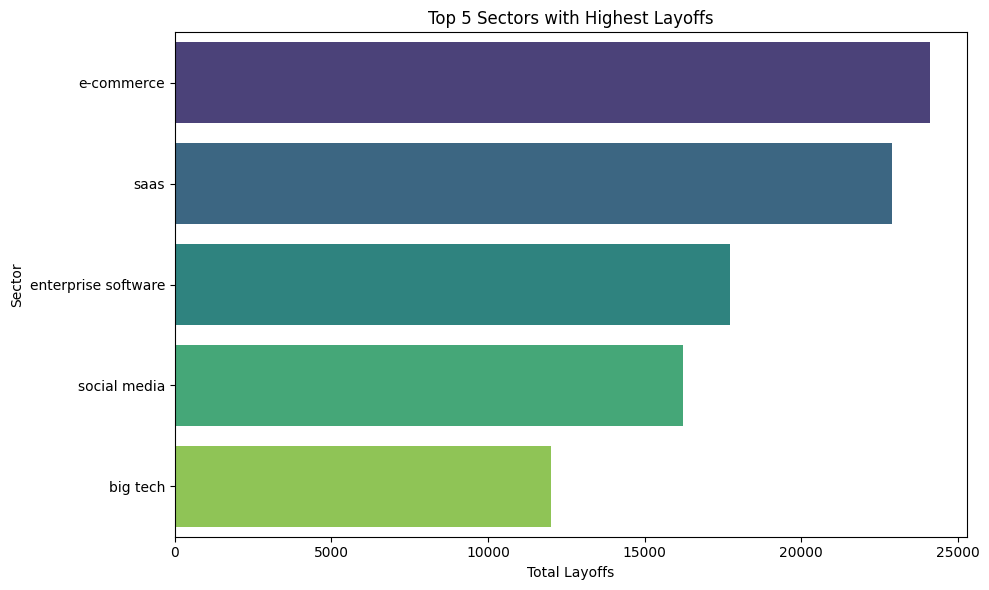

In [123]:
sector_and_layoffs_exploded_grouped=sector_and_layoffs_exploded.groupby('sectors').sum().sort_values(by='total_layoffs',ascending=False)

sector_and_layoffs_exploded_grouped.head(20)

top_10_sector_layoffs=sector_and_layoffs_exploded_grouped.head(5)
plt.figure(figsize=(10,6))
sns.barplot(
     x=top_10_sector_layoffs['total_layoffs'],
     y=top_10_sector_layoffs.index,
     palette='viridis'
)
plt.title('Top 5 Sectors with Highest Layoffs')
plt.xlabel('Total Layoffs')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()
